In [1]:
"""
Load the data and visualization the distribution change with amp
to find a proper value of amp

"""

'\nLoad the data and visualization the distribution change with amp\nto find a proper value of amp\n\n'

In [2]:
%load_ext autoreload
%autoreload 2
import sys
import os

# Get the path to the parent folder of the notebook
notebook_dir = os.getcwd()  # should be 'project/notebooks'
utils_path = os.path.abspath(os.path.join(notebook_dir, '..', 'utilis'))

# Add to sys.path
if utils_path not in sys.path:
    sys.path.append(utils_path)

import matplotlib.pyplot as plt
plt.rcParams.update({
    'mathtext.fontset': 'stix',
    'font.family': 'STIXGeneral',
    'axes.unicode_minus': False,
    'font.size': 14,           # General font size
    'axes.titlesize': 16,      # Title font size
    'axes.labelsize': 14,      # X and Y label font size
    'xtick.labelsize': 12,     # X tick label font size
    'ytick.labelsize': 12,     # Y tick label font size
    'legend.fontsize': 12,     # Legend font size
    'figure.titlesize': 18     # Figure title font size (suptitle)
})


In [ ]:
# load the similarity calculation results
import pickle
data_type = 's'
sample_se = '2'
save_folder_0 = f'{notebook_dir}/results_folder/'
# save_folder = '20250908_OVPE_2021_' + data_type
# save_folder = '20250908_HVPE_2021_' + data_type
save_folder = f'20251002_ffc_2024_{data_type}_{sample_se}' 
save_path = save_folder_0 + save_folder
data_save_target = save_path + "/similarity_score.pickle"

with open(data_save_target, 'rb') as f:
    data = pickle.load(f)

data = {round(k, 3): v for k, v in data.items()}
data.keys()

dict_keys([np.float64(0.0), np.float64(0.5), np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(3.5), np.float64(4.0), np.float64(4.5), np.float64(5.0), np.float64(5.5), np.float64(6.0), np.float64(6.5), np.float64(7.0), np.float64(7.5), np.float64(8.0), np.float64(8.5), np.float64(9.0), np.float64(9.5), np.float64(10.0), np.float64(10.5), np.float64(11.0), np.float64(11.5), np.float64(12.0), np.float64(12.5), np.float64(13.0), np.float64(13.5), np.float64(14.0), np.float64(14.5), np.float64(15.0), np.float64(15.5), np.float64(16.0), np.float64(16.5), np.float64(17.0), np.float64(17.5), np.float64(18.0), np.float64(18.5), np.float64(19.0), np.float64(19.5), np.float64(20.0), np.float64(20.5), np.float64(21.0), np.float64(21.5), np.float64(22.0), np.float64(22.5), np.float64(23.0), np.float64(23.5), np.float64(24.0), np.float64(24.5), np.float64(25.0), np.float64(25.5), np.float64(26.0), np.float64(26.5), np.float64(27.0), np.float64(27.5), n

In [3]:
# load the coor info accordingly
from part1_data_lodaer import *
# _, S = data_loader_ovpe_2021_optimized(results_type='S', data_type = data_type)
# _, S = data_loader_hvpe_2021_optimized(results_type='S', data_type = data_type)
_, S = data_loader_ffc_2024_optimized(results_type='S', data_type=data_type, sample_se = sample_se)
S.shape

X and S have shapes of (0,), (1525, 2)
Memory usage: X=0.0MB, S=0.0MB


(1525, 2)

In [4]:
S

array([[  0., 300.],
       [  5., 300.],
       [ 10., 300.],
       ...,
       [110.,   0.],
       [115.,   0.],
       [120.,   0.]], shape=(1525, 2), dtype=float32)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
93020    30.0
93021    30.0
93022    30.0
93023    30.0
93024    30.0
Name: amp, Length: 93025, dtype: category
Categories (61, float64): [0.0 < 0.5 < 1.0 < 1.5 ... 28.5 < 29.0 < 29.5 < 30.0]


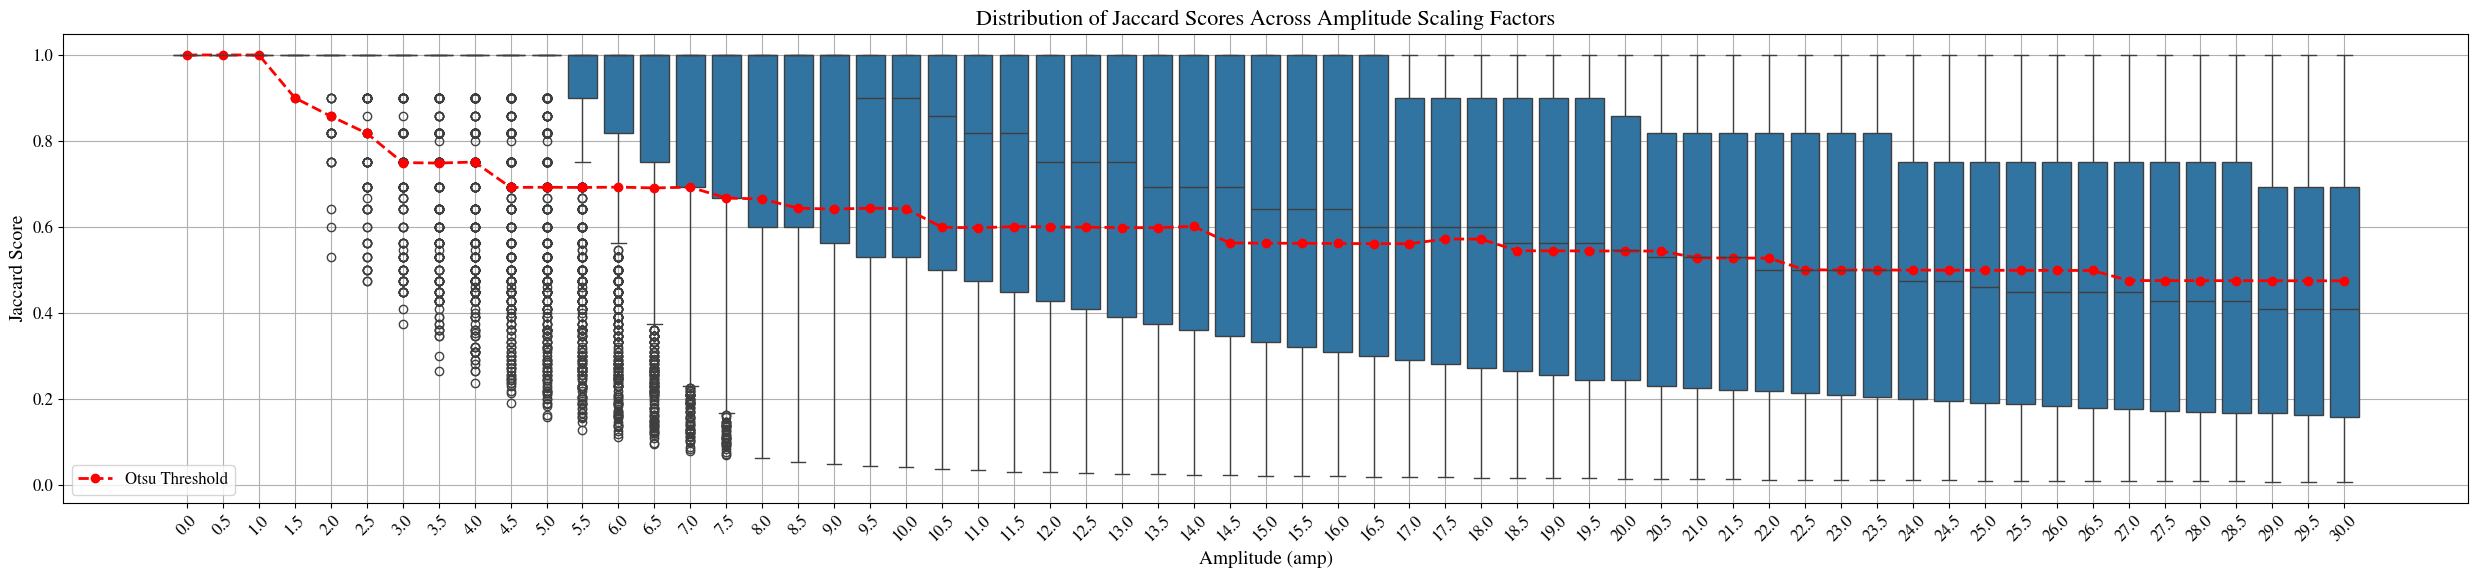

In [5]:
# visualize the box-plot v.s. amp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.filters import threshold_otsu

# Step 1: Prepare data
plot_data = []
for amp, result in data.items():
    for score in result['jaccard_scores']:
        plot_data.append({'amp':amp, 'jaccard_score': score})

df = pd.DataFrame(plot_data)

# Step 2: Calculate Otsu thresholds per group
threshold_points = []
for amp, group in df.groupby('amp'):
    try:
        threshold = threshold_otsu(group['jaccard_score'].values)
    except ValueError:
        threshold = None
    if threshold is not None:
        threshold_points.append({'amp': amp, 'threshold': threshold})

threshold_df = pd.DataFrame(threshold_points)

# Step 3: Create consistent category ordering
amp_order = sorted(df['amp'].unique(), key=lambda x: float(x) if isinstance(x, (int, float, str)) and str(x).replace('.', '', 1).isdigit() else str(x))
df['amp'] = pd.Categorical(df['amp'], categories=amp_order, ordered=True)
threshold_df['amp'] = pd.Categorical(threshold_df['amp'], categories=amp_order, ordered=True)

# Step 4: Plot
plt.figure(figsize=(25, 6))
print(df['amp'])
ax = sns.boxplot(data=df, x='amp', y='jaccard_score', order=amp_order)

# Overlay threshold as a line + scatter plot
threshold_y = threshold_df['threshold'].values
threshold_x = range(len(threshold_y))  # Numeric positions for categories
ax.plot(threshold_x, threshold_y, color='red', linestyle='--', marker='o', linewidth=2, label='Otsu Threshold')

# Set labels and styles
plt.title("Distribution of Jaccard Scores Across Amplitude Scaling Factors")
plt.xlabel("Amplitude (amp)")
plt.ylabel("Jaccard Score")
plt.xticks(ticks=threshold_x, labels=threshold_df['amp'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


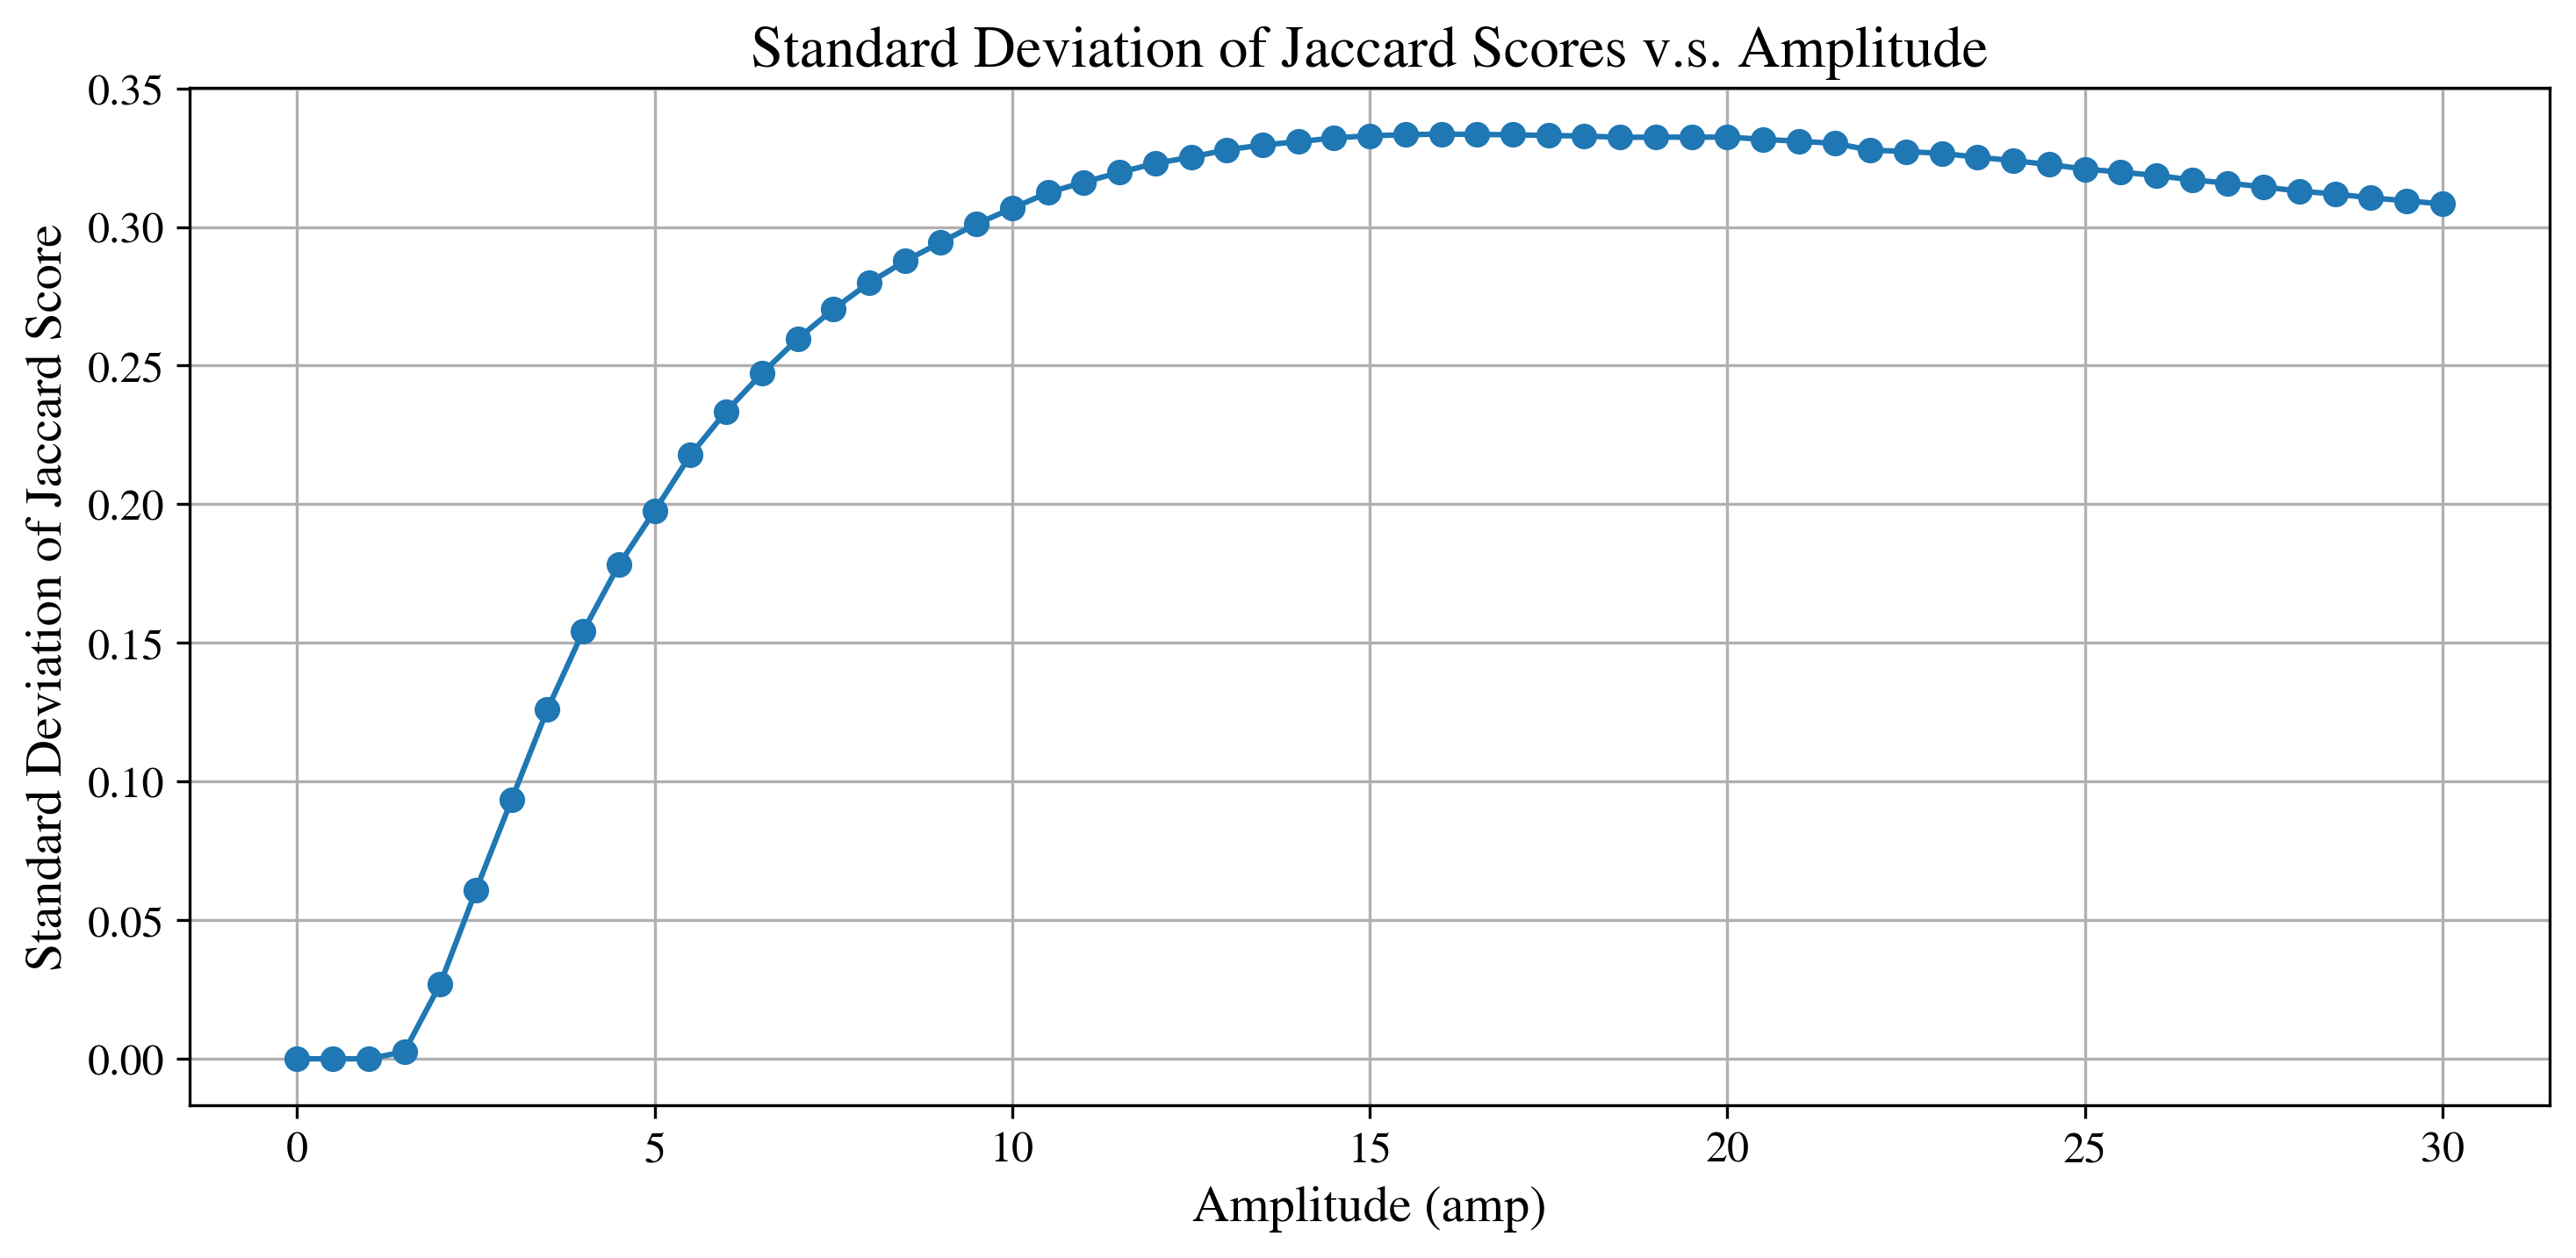

In [6]:
# visualize the std. v.s. amp
import numpy as np
std_data = {
    amp: np.std(result['jaccard_scores']) 
    for amp, result in data.items()
    # if amp < 1.7
}
# Convert to DataFrame for plotting
std_df = pd.DataFrame(list(std_data.items()), columns=["amp", "std_dev"])

# Plot standard deviation vs. amp
plt.figure(figsize=(10, 5), dpi = 300)
plt.plot(std_df["amp"], std_df["std_dev"], marker='o')
plt.title("Standard Deviation of Jaccard Scores v.s. Amplitude")
plt.xlabel("Amplitude (amp)")
plt.ylabel("Standard Deviation of Jaccard Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
max_index_df = std_df["std_dev"].idxmax()
max_amp_df = std_df.loc[max_index_df, "amp"]
max_std_dev_df = std_df.loc[max_index_df, "std_dev"]

print("Max amp:", max_amp_df)
print("Max std_dev:", max_std_dev_df)

# take a value = max or near the max as the selected_amp
selected_amp = max_amp_df

Max amp: 16.0
Max std_dev: 0.3335187429949716


In [8]:
############# needed when std v.s. amp changes too gentle ##############
selected_amp = 13

#####################

In [9]:

data.keys()

dict_keys([np.float64(0.0), np.float64(0.5), np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(3.5), np.float64(4.0), np.float64(4.5), np.float64(5.0), np.float64(5.5), np.float64(6.0), np.float64(6.5), np.float64(7.0), np.float64(7.5), np.float64(8.0), np.float64(8.5), np.float64(9.0), np.float64(9.5), np.float64(10.0), np.float64(10.5), np.float64(11.0), np.float64(11.5), np.float64(12.0), np.float64(12.5), np.float64(13.0), np.float64(13.5), np.float64(14.0), np.float64(14.5), np.float64(15.0), np.float64(15.5), np.float64(16.0), np.float64(16.5), np.float64(17.0), np.float64(17.5), np.float64(18.0), np.float64(18.5), np.float64(19.0), np.float64(19.5), np.float64(20.0), np.float64(20.5), np.float64(21.0), np.float64(21.5), np.float64(22.0), np.float64(22.5), np.float64(23.0), np.float64(23.5), np.float64(24.0), np.float64(24.5), np.float64(25.0), np.float64(25.5), np.float64(26.0), np.float64(26.5), np.float64(27.0), np.float64(27.5), n

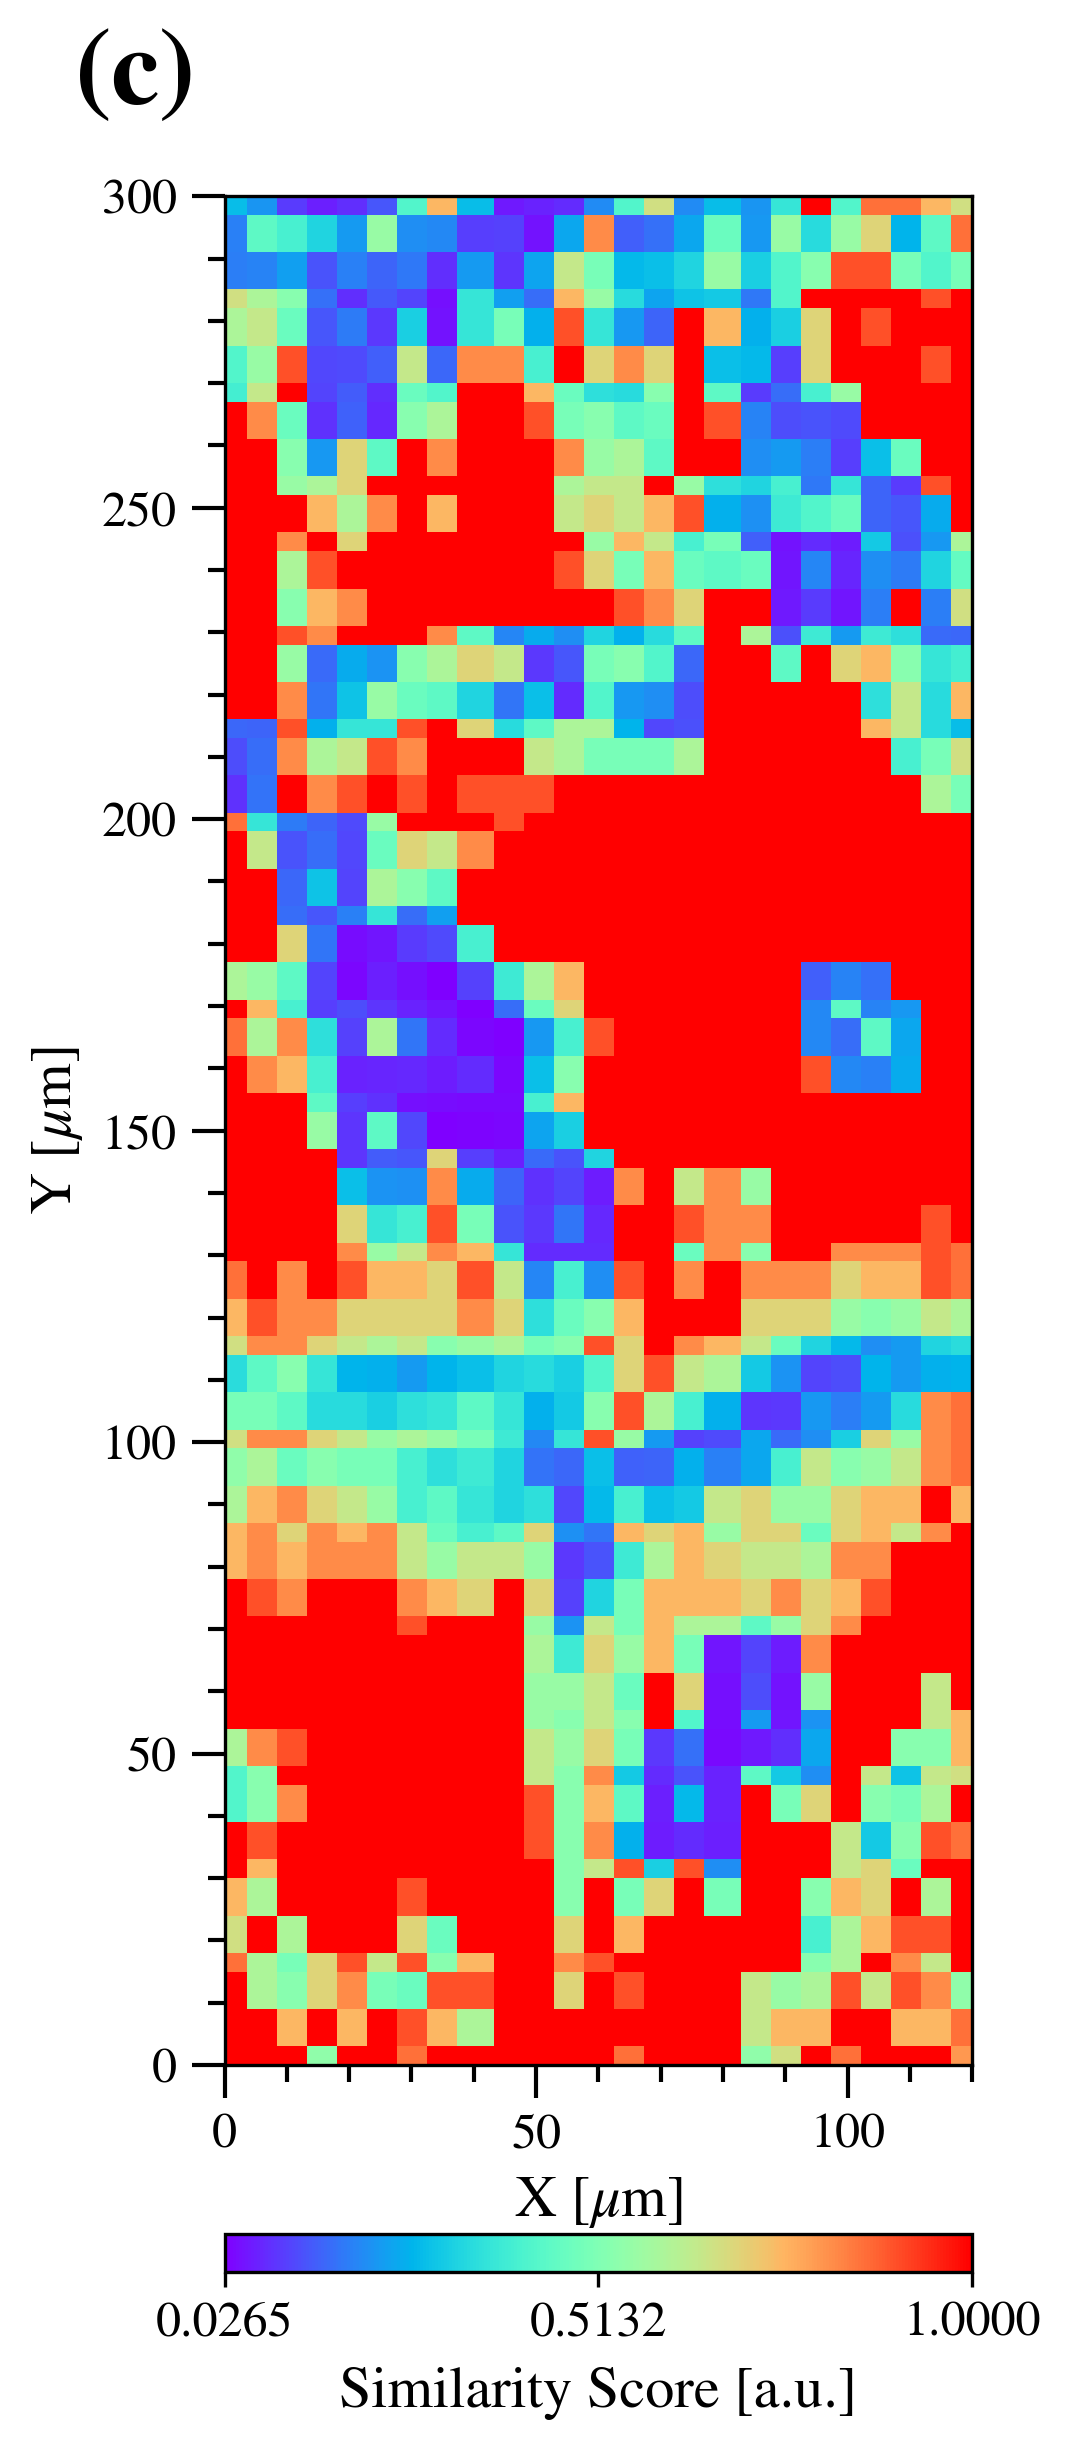

In [10]:
# visualize the results
import utilis_plot
from utilis_plot import sample_plot

# fig, ax = plt.subplots(1, 1, figsize = (2.5, 8.5), dpi = 300)
# fig, ax = plt.subplots(1, 1, figsize = (3.5, 8.5), dpi = 300)
fig, ax = plt.subplots(1, 1, figsize = (3.5, 8.5), dpi = 300)

########## depends on cases ################
# S_mask = np.where(S[:,1] <= 87)[0]
S_mask = None
################################################

if S_mask is not None:
    S_filtered = S[S_mask]
    jaccard_filtered = np.array(data[selected_amp]['jaccard_scores'])[S_mask]
else:
    S_filtered = S
    jaccard_filtered = np.array(data[selected_amp]['jaccard_scores'])

# selected_amp = 5
sample_plot(ax, S = S_filtered, data = jaccard_filtered,
           colorbar_title = 'Similarity Score [a.u.]', label = 'c',
           set_ticks_flag = True)

In [1]:
# check the results'variation with amp
# fig, axes = plt.subplots(2, 4, figsize = (18, 10), dpi = 300)
# # fig, axes = plt.subplots(2, 4, figsize = (8, 14), dpi = 300)

# # selected_amp = 5
# axes_f = axes.flatten()
# selected_amp_ls = [0, 4, 8, 12, 16, 20, 24, 28] # , 'ini']
# label_ls = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
# for ax, selected_amp_temp, label_temp in zip(axes_f, selected_amp_ls, label_ls):
#     # if selected_amp_temp == 'ini':
#     #     sample_plot(ax, S = S, data = data_only_XRD[5.0]['jaccard_scores'],
#     #         colorbar_title = 'Similarity Score [a.u.]'
#     #         , label = label_temp, amp = selected_amp_temp)
#     # else:
#         sample_plot(ax, S = S, data = data[selected_amp_temp]['jaccard_scores'],
#             colorbar_title = 'Similarity Score [a.u.]'
#             , label = label_temp, amp = selected_amp_temp)